# Howto classify articles with scikit-learn : 3
In the second file, there was an error. The score was part of the X data. Therefore it is easy to determine the category. The aim of this section is to predict the category without knowing the response.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import matplotlib
# Enable inline plotting
%matplotlib inline
filename = r'linuxfr_better.csv'
lf_data = pd.read_csv(filename, encoding="UTF-8", sep='£', engine='python', quotechar='µ')
# Correction of the order for the matrix
targets_names = ['Average Troll', 'Magnificient Troll', 'Quality Troll']
targets=lf_data.quality_content
#del lf_data['count']
print("There are {} diaries in the dataframe.".format(len(lf_data)))
lf_data['birthday'] = pd.to_datetime(lf_data['birthday'], infer_datetime_format=False)
lf_data['datetime'] = pd.to_datetime(lf_data['datetime'], infer_datetime_format=False)
lf_data['age'] = lf_data['datetime']-lf_data['birthday']
lf_data['newbie'] = False

There are 5985 diaries in the dataframe.


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

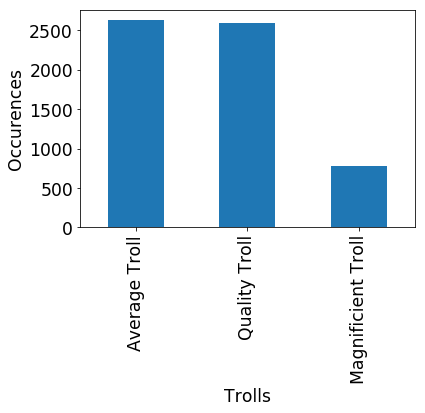

In [ ]:
def data_prepare(pd):
    print("There are {} diaries in the dataframe.".format(len(pd)))
    pd['birthday'] = pd.to_datetime(pd['birthday'], infer_datetime_format=False)
    pd['datetime'] = pd.to_datetime(pd['datetime'], infer_datetime_format=False)
    pd['age'] = pd['datetime']-pd['birthday']
    pd['newbie'] = False
    pd.quality_content.value_counts().plot(kind='bar')
    plt.ylabel('Occurences', fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.xlabel('Trolls', fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    score_df = lf_data[['datetime', 'score']].copy()
    score_df.index = score_df['datetime']
    del score_df['datetime']
    score_df.head()
    score_df = pd[['datetime', 'score']].copy()
    score_df.index = score_df['datetime']
    del score_df['datetime']
    score_df.head()
    return pd
lf_data = data_prepare(lf_data)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score</th>
    </tr>
    <tr>
      <th>datetime</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2017-06-10 14:49:57</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2017-06-09 23:12:08</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>2017-06-09 12:52:03</th>
      <td>35.0</td>
    </tr>
    <tr>
      <th>2017-06-08 16:34:27</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>2017-06-08 13:24:36</th>
      <td>40.0</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(4, 4))

In [ ]:
from statistics import mean, stdev, StatisticsError

def string_list_to_data(sl):
    sl = sl.replace("[",'')
    sl = sl.replace("]",'')
    sl = sl.replace(",",'')
    sl = sl.split()
    l = [float(x) for x in sl]   
    try:
        std_l = stdev(l)
    except StatisticsError:
        std_l = 0
    try:
        mean_l = mean(l)
    except StatisticsError:
        mean_l = 0
    return l, mean_l, std_l


def data_prepare2(pd)
    
    pd['cl_std_score'] = 0
    pd['cl_average_score'] = 0
    
    pd['ps_std_score'] = 0
    pd['ps_average_score'] = 0

    for index, line in pd.iterrows():
        # Problem: sometimes, age << 0
        if line['age'] < pd.Timedelta("0 day"):
                line['age'] = - line['age']        
        if line['age'] < pd.Timedelta("1 day"):
            pd.set_value(index, 'newbie', True)
            s = line['score']
            n = line['newbie']
            a = line['author']
            age = line['age']
            if s > 0:
                print("Auteur: {} | Score: {} | Newbie: {} | age : {}".format(a, s, n,  age))
    
    
    for index, line in pd.iterrows():
            ps = line['author_previous_scores']
            cl = line['comments_scores']
            #print(ps)
            ps, mean_ps, median_ps = string_list_to_data(ps)
            cl, mean_cl, median_cl = string_list_to_data(cl)
            #print("ps", ps, "comments", cl)
            pd.set_value(index, 'ps_std_score', median_ps)
            pd.set_value(index, 'ps_average_score', mean_ps)
            pd.set_value(index, 'cl_std_score', median_cl)
            pd.set_value(index, 'cl_average_score', mean_cl)
            #if abs(median - avg) > 2: 
            #    print("median: {} | Avg: {}| Scores : {}".format(median, avg, ps))
        
lf_data = data_prepare2(lf_data)

Auteur: guanglier | Score: 11.0 | Newbie: False | age : 0 days 07:43:20
Auteur: coquelicot-bleu | Score: 31.0 | Newbie: False | age : 0 days 16:11:28
Auteur: alb | Score: 2.0 | Newbie: False | age : 0 days 20:57:44
Auteur: jrouquie | Score: 16.0 | Newbie: False | age : 0 days 21:08:33
Auteur: soohwa | Score: 21.0 | Newbie: False | age : 0 days 00:13:24
Auteur: bsc | Score: 26.0 | Newbie: False | age : 0 days 22:30:35
Auteur: matutine | Score: 24.0 | Newbie: False | age : 0 days 13:31:53
Auteur: nahoj | Score: 16.0 | Newbie: False | age : 0 days 14:14:58
Auteur: nalara | Score: 17.0 | Newbie: False | age : 0 days 01:14:40
Auteur: Nokto | Score: 11.0 | Newbie: False | age : 0 days 09:55:23
Auteur: mikael.desharnais | Score: 17.0 | Newbie: False | age : 0 days 16:18:26
Auteur: Adrianne96 | Score: 77.0 | Newbie: False | age : 0 days 14:46:01
Auteur: binoyte | Score: 27.0 | Newbie: False | age : 0 days 12:07:09


Auteur: Lee_lolcat | Score: 78.0 | Newbie: False | age : 0 days 20:16:34
Auteur: YvanM | Score: 19.0 | Newbie: False | age : 0 days 14:39:23
Auteur: albang | Score: 43.0 | Newbie: False | age : 0 days 11:39:57
Auteur: Charly | Score: 55.0 | Newbie: False | age : 0 days 13:35:47
Auteur: guaria | Score: 11.0 | Newbie: False | age : 0 days 15:58:35
Auteur: openwideINGENIERIE | Score: 9.0 | Newbie: False | age : 0 days 09:33:32
Auteur: ceciestuncompte | Score: 30.0 | Newbie: False | age : 0 days 13:30:40
Auteur: Joack | Score: 17.0 | Newbie: False | age : 0 days 11:52:25
Auteur: Thuban | Score: 47.0 | Newbie: False | age : 0 days 17:47:48
Auteur: plop_plop_sys | Score: 95.0 | Newbie: False | age : 0 days 11:10:39
Auteur: pitonPatate | Score: 36.0 | Newbie: False | age : 0 days 09:50:48


Auteur: BLepers | Score: 31.0 | Newbie: False | age : 0 days 11:07:35
Auteur: nib | Score: 15.0 | Newbie: False | age : 0 days 18:20:11
Auteur: palopap | Score: 30.0 | Newbie: False | age : 0 days 20:14:56
Auteur: mario_26 | Score: 20.0 | Newbie: False | age : 0 days 23:11:27
Auteur: denxp | Score: 33.0 | Newbie: False | age : 0 days 19:22:15
Auteur: sylvain | Score: 11.0 | Newbie: False | age : 0 days 15:23:07
Auteur: Nicolas49 | Score: 6.0 | Newbie: False | age : 0 days 19:33:54
Auteur: jeekajoo | Score: 7.0 | Newbie: False | age : 0 days 12:47:37
Auteur: neven | Score: 14.0 | Newbie: False | age : 0 days 17:00:42
Auteur: tim_au_tea | Score: 25.0 | Newbie: False | age : 0 days 09:01:14
Auteur: christophe_g | Score: 109.0 | Newbie: False | age : 0 days 17:28:35
Auteur: lapapla | Score: 54.0 | Newbie: False | age : 0 days 10:32:54
Auteur: xunfr | Score: 21.0 | Newbie: False | age : 0 days 13:24:36
Auteur: tagadala | Score: 4.0 | Newbie: False | age : 0 days 15:17:36
Auteur: fredoule2k

Auteur: jdbonjour | Score: 19.0 | Newbie: False | age : 0 days 09:40:55
Auteur: zvin | Score: 24.0 | Newbie: False | age : 0 days 10:03:38
Auteur: poncin.matthieu | Score: 21.0 | Newbie: False | age : 0 days 16:21:06
Auteur: hacker91 | Score: 11.0 | Newbie: False | age : 0 days 16:54:56
Auteur: 261f030600e9 | Score: 23.0 | Newbie: False | age : 0 days 14:50:17
Auteur: alsaln | Score: 28.0 | Newbie: False | age : 0 days 09:44:51
Auteur: ThibG | Score: 19.0 | Newbie: False | age : 0 days 10:35:10
Auteur: trolleurPro | Score: 74.0 | Newbie: False | age : 0 days 19:38:07
Auteur: Günther Freimann | Score: 47.0 | Newbie: False | age : 0 days 15:13:41
Auteur: nickel | Score: 15.0 | Newbie: False | age : 0 days 16:56:30
Auteur: damien | Score: 2.0 | Newbie: False | age : 0 days 00:18:23
Auteur: openpom | Score: 8.0 | Newbie: False | age : 0 days 15:16:45
Auteur: aurelix | Score: 2.0 | Newbie: False | age : 0 days 19:49:35
Auteur: 6louette | Score: 26.0 | Newbie: False | age : 0 days 22:33:47
A

# Graphs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
counter = CountVectorizer()
counter_author = counter.fit_transform(lf_data['author'])
counter_content = counter.fit_transform(lf_data['content'])

vectors = TfidfTransformer()
#xcontent = vectors.fit_transform(counter_content)
#xauthor = vectors.fit_transform(counter_author)
#lf_data['xcontent']=list(xcontent.toarray())
#lf_data['xauthor']=list(xauthor.toarray())
#lf_data[['xcontent', xauthor]].head()

In [ ]:
lf_data.dtypes

title                              object
author                             object
url                                object
score                             float64
content                            object
quality_content                    object
count                               int64
datetime                   datetime64[ns]
author_url                         object
author_previous_scores             object
birthday                   datetime64[ns]
n_comments                          int64
comments_scores                    object
age                       timedelta64[ns]
newbie                               bool
cl_std_score                        int64
cl_average_score                    int64
ps_std_score                        int64
ps_average_score                    int64
dtype: object

In [ ]:
lf_data.dtypes

title                              object
author                             object
url                                object
score                             float64
content                            object
quality_content                    object
count                               int64
datetime                   datetime64[ns]
author_url                         object
author_previous_scores             object
birthday                   datetime64[ns]
n_comments                          int64
comments_scores                    object
age                       timedelta64[ns]
newbie                               bool
cl_std_score                        int64
cl_average_score                    int64
ps_std_score                        int64
ps_average_score                    int64
dtype: object

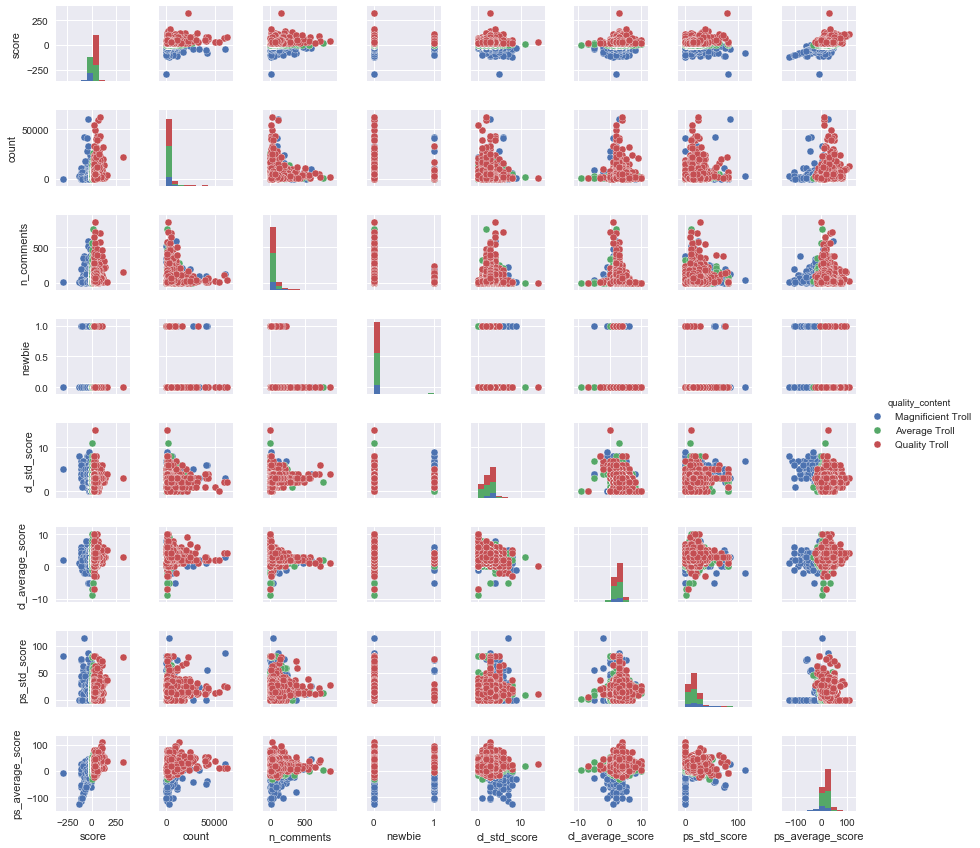

In [ ]:
import seaborn as sns
sns.set()
#df = sns.load_dataset("LinuxFR")
sns.pairplot(lf_data, hue="quality_content", dropna=True, size=1.5)
# markers=["o", "s", "D", "X"], size=15

# BIG Pipeline 
 * content
 * author
 * numerical data

# BIG Pipeline 
 * content
 * author
 * numerical data

In [ ]:
# From  http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_footer
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_quoting
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

class MultipleItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys):
        self.keys = keys

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.keys]

class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys):
        self.keys = keys

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.keys].tolist()

pipeline = Pipeline([
    # Extract the subject & body
    #('subjectbody', DataExtractor()),

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the post's subject line
            ('author', Pipeline([
                ('selector', TextSelector(keys='author')),
                #('vectorizer', CountVectorizer(ngram_range=(1,2))), 
                ('tfidf', TfidfVectorizer(min_df=50)),
            ])),

            # Pipeline for standard bag-of-words model for body
            ('content', Pipeline([
                ('selector', TextSelector(keys='content')),
                #('vectorizer', CountVectorizer(ngram_range=(1,2))), 
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
            ])),

            # Pipeline dealing with numerical values stored in a dict
            ('num_values', Pipeline([
                ('selector', MultipleItemSelector(keys=['average_score', 'count']))
                ,  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'author': 1.0,      # 0.8
            'content': 1.0,     # 0.5
            'num_values': 1.0,  # 1.0
        },
    )),

    # Use a SVC classifier on the combined features
    #('svc', SVC(kernel='rbf', probability=True)),
    ('svc', SVC(kernel='linear')),  # KO
    #('svc', LinearSVC()),
    #('clf', GaussianNB()),
    #('clf', SGDClassifier()),
    
])

In [ ]:
a = MultipleItemSelector(keys='author')
r = a.transform(lf_data)
r = r.tolist()
print(type(r))
TfidfVectorizer(r, min_df=50)
#print(r)
#pipeline.fit(lf, target.values.ravel()

<class 'list'>


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=['VoixOff', 'Pinaraf', 'Funix', 'xunfr', 'vejmarie', 'ComputingFroggy', 'Maderios', 'UnGrandJour', 'Patrick Trauquesègues', 'xunfr', 'cppuser', 'Adrien Dorsaz', 'Benoît Sibaud', 'Patrick Trauquesègues', 'serge_sans_paille', 'Glandos', 'NumOpen', '_kaos_', 'pamputt', 'skhaen', 'thamieu', 'Patri...aire Bialès', 'Gniarf', 'Paf', 'xbright', 'batisteo', 'djibb', 'maderios', 'LiNuCe', 'Sytoka Modon'],
        lowercase=True, max_df=1.0, max_features=None, min_df=50,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier()),])

In [ ]:
_= text_clf.fit(lf_data.content, targets)

In [ ]:
pipeline.fit(lf, target.values.ravel())

Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('author', Pipeline(steps=[('selector', TextSelector(keys='author')), ('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lower...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))])

# Small Pipeline

Regression
 * count
 * average

In [ ]:
# From  http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_footer
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_quoting
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model

class MultipleItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys):
        self.keys = keys

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.keys]


pipeline = Pipeline([
    # Extract the subject & body
    #('subjectbody', DataExtractor()),

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[
            # Pipeline dealing with numerical values stored in a dict
            ('num_values', Pipeline([
                ('selector', MultipleItemSelector(keys=['cl_std_score', 'count', 'n_comments',
                                                        'cl_average_score', 'ps_average_score']))
                ,  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'num_values': 1.0,  # 1.0
        },
    )),

    # Use a SVC classifier on the combined features
    #('svc', SVC(kernel='rbf', probability=True)),
    ('svc', SVC(kernel='linear')),  # KO
    #('svc', LinearSVC()),
    #('clf', GaussianNB()),
    #('svc', SGDClassifier()),
    
])

In [ ]:
lf_data['ps_average_score'].head()

0    28
1    14
2     1
3    30
4    34
Name: ps_average_score, dtype: int64

In [ ]:
lf = lf_data[['cl_std_score', 'count', 'n_comments','cl_average_score', 'ps_average_score']].copy()
target = lf_data[['quality_content']].copy()

In [ ]:
pipeline.fit(lf, target.values.ravel())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         lf,  # training data
                         target.values.ravel(),  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         #scoring='accuracy',  # which scoring metric?
                         scoring='f1_weighted',
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)
print('Total diaries classified:', len(lf_data))
print('Score:', sum(scores)/len(scores))

/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.28048842  0.28211569  0.28465467  0.28268481  0.29592379  0.29759654
  0.29392117  0.29775406  0.27052672  0.27688477]
Total diaries classified: 5985
Score: 0.286255064368


In [ ]:
filename = r'out_of_sample_complete.csv'
lf_out = pd.read_csv(filename, encoding="UTF-8", sep='£', engine='python', quotechar='µ')
lf_out.dtypes
lf_out = lf_out.reindex(np.random.permutation(lf_out.index))
lf_out = data_prepare(lf_out)
lf_out = data_prepare2(lf_out)